In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

In [2]:
df_loyalty  = pd.read_csv("Customer Loyalty History.csv", index_col= 0)
df_loyalty.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [3]:
df_f_activity  = pd.read_csv("Customer Flight Activity.csv", index_col= 0)
df_f_activity.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


## EDA

In [4]:
print(f"El número de filas que tenemos en Customer Loyalty History es {df_loyalty.shape[0]}, y el número de columnas es {df_loyalty.shape[1]}")

El número de filas que tenemos en Customer Loyalty History es 16737, y el número de columnas es 15


In [5]:
print(f"El número de filas que tenemos en Customer Fligth Activity es {df_f_activity.shape[0]}, y el número de columnas es {df_f_activity.shape[1]}")

El número de filas que tenemos en Customer Fligth Activity es 405624, y el número de columnas es 9


In [6]:
df_loyalty.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [7]:
df_f_activity.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [8]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

In [9]:
df_f_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [10]:
df_loyalty.isna().sum() / df_loyalty.shape[0] * 100 #porcentaje de nulos

Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [11]:
df_f_activity.isna().sum() / df_f_activity.shape[0] * 100 #no encontramos valores nulos en este DF

Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [12]:
df_cat = df_loyalty.select_dtypes(include = "object") #definimos las columnas categoricas de df_loyalty
df_cat.head()

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
Loyalty Number,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,Standard
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,Standard
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,Standard
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,Standard
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,Standard


In [13]:
df_num = df_loyalty.select_dtypes(include = ["int", 'float']) #definimos las columnas numéricas de df_loyalty
df_num.head()

,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,
480934,83236.0,3839.14,2016,2,NaN,NaN
549612,NaN,3839.61,2016,3,NaN,NaN
429460,NaN,3839.75,2014,7,2018.0,1.0
608370,NaN,3839.75,2013,2,NaN,NaN
530508,103495.0,3842.79,2014,10,NaN,NaN


In [14]:
df_num2 = df_f_activity.select_dtypes(include = ["int", 'float']) #definimos las columnas numéricas de df_loyalty
df_num2.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [15]:
df_loyalty.describe(include = "object").T 


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [16]:
#df_f_activity.describe(include = "object").T  no hay columnas categóricas

In [17]:
df_loyalty.duplicated().sum()

np.int64(0)

In [18]:
df_f_activity.duplicated().sum() #tiene sentido que haya duplicados teniendo en cuenta que es un historial de actividad del cliente

np.int64(228705)

In [ ]:
df = pd.merge(df_loyalty, df_f_activity, on='Loyalty Number', how='inner') #juntamos los dos archivos. Hice un merge inner ya que queremos analizar los datos que tienen en comun los dos df

In [20]:
#dejamos loyalty number como columna y no como indice
if df.index.name == 'Loyalty Number': 
    df = df.reset_index()
    print("✅ 'Loyalty Number' ha sido devuelto a su estado de columna.")

print("\nEstado actual del 'Loyalty Number':")
print(df[['Loyalty Number']].head())


✅ 'Loyalty Number' ha sido devuelto a su estado de columna.

Estado actual del 'Loyalty Number':
   Loyalty Number
0          480934
1          480934
2          480934
3          480934
4          480934


In [21]:
df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [22]:
df.isna().sum() / df.shape[0] *100 #anaizamos los datos nulos en conjunto y vemos que coinciden con los nulos de los df por separado

Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Month             87.657535
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Poin

In [23]:
df['Salary'].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.])

In [24]:
df['Country'].value_counts() #vemos que el único páis que aparece es Canadá

Country
Canada    405624
Name: count, dtype: int64

In [25]:
df['Province'].value_counts().reset_index()

,Province,count
0,Ontario,130896
1,British Columbia,106848
2,Quebec,79968
3,Alberta,23400
4,Manitoba,15984
5,New Brunswick,15432
6,Nova Scotia,12576
7,Saskatchewan,9936
8,Newfoundland,6312
9,Yukon,2688


In [26]:
df['City'].value_counts(ascending=True).reset_index()

,City,count
0,Charlottetown,1584
1,Kelowna,2136
2,Whitehorse,2688
3,Peace River,2712
4,London,4224
5,Banff,4296
6,Calgary,4584
7,Moncton,5088
8,Sudbury,5520
9,Thunder Bay,6264


In [27]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.87,258935.29,100018.00,326961.00,550834.00,772194.00,999986.00
Salary,302952.0,79268.83,34992.13,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.98,6863.66,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment Year,405624.0,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,405624.0,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Cancellation Year,50064.0,2016.50,1.38,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,50064.0,6.97,3.45,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.12,5.23,0.00,0.00,1.00,8.00,21.00


Lo primero que llama la atención es el valor mínimo de 'salary', siendo un valor negativo. Esto nos indica que hay algo mal y, efectivamente, encontramos que hay valores escritos en negativo

## LIMPIEZA

In [28]:
df.columns = df.columns.str.lower() #ponemos el nombre de las columnas en minuscula


In [29]:
df.columns = df.columns.str.replace(' ', '_') #cambiamos los espacios por _

In [30]:
df.sample(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
346985,695686,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,73492.0,Married,Star,6672.13,Standard,2016,10,NaN,NaN,2018,6,7,0,7,3444,344.0,0,0
246349,771307,Canada,Ontario,Toronto,P2T 6G3,Female,College,NaN,Married,Star,2316.80,Standard,2013,11,NaN,NaN,2018,3,10,0,10,700,75.6,0,0
158781,847312,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,22313.0,Married,Aurora,7316.65,2018 Promotion,2018,3,2018.0,11.0,2018,8,2,2,4,3288,328.0,0,0
276543,389812,Canada,Ontario,Toronto,P1W 1K4,Male,High School or Below,62209.0,Married,Star,2627.76,Standard,2017,12,NaN,NaN,2018,2,8,0,8,904,97.2,0,0
332034,716236,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,94433.0,Single,Star,5421.54,Standard,2017,2,2017.0,10.0,2018,7,0,0,0,0,0.0,0,0


In [31]:
df['salary'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
salary,302952.0,79268.825953,34992.133508,-58486.0,59262.0,73479.0,88612.0,407228.0


In [32]:
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

<Axes: xlabel='salary'>

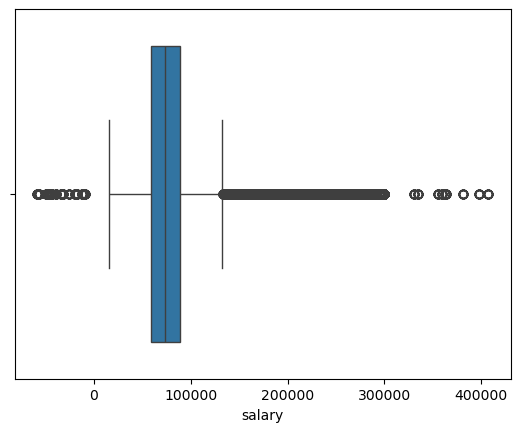

In [33]:
sns.boxplot(data=df, x='salary')

aqui hacemos una primera comprobación para ver cuántos valores negativos hay y si pueden cuadrar dentro de el rengo de valores  más comunes. Vemos que cuadran y determinamos que son valores que están escritos de forma erronea en negativo

In [34]:
df['salary'] = df['salary'].apply(np.abs)

print("✅ Signos negativos eliminados de la columna 'salary'.")

# Verificación de la limpieza
salario_min_limpio = df['salary'].min()
print(f"Nuevo valor mínimo en 'salary': {salario_min_limpio:,.0f}")

✅ Signos negativos eliminados de la columna 'salary'.
Nuevo valor mínimo en 'salary': 9,081


In [35]:
df['salary'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
salary,302952.0,79381.440228,34735.904533,9081.0,59262.0,73479.0,88612.0,407228.0


ahora vemos que ya no salen valores negativos en salary y que el valor minimo es 9081.0

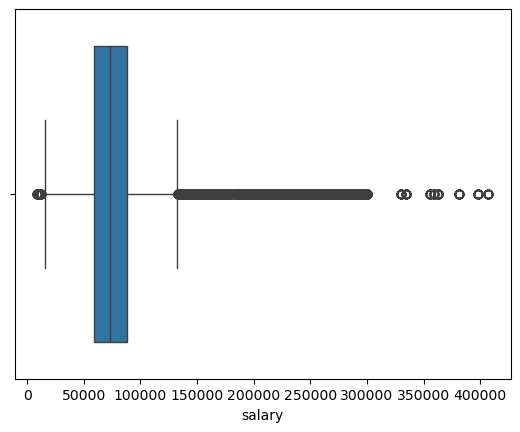

In [36]:
sns.boxplot(data=df, x='salary');

A partir de aquí,vamos a imputar los nulos de la categoría 'College' en Education, ya que aparece un 100% de nulos en esta categoría. La manera de hacerlo va a ser encontrando el valor medio entre HS y Bachelor, y asignandole ese valor medio

In [37]:
mean_education = df.groupby('education')['salary'].mean().sort_values().reset_index()

In [38]:
mean_education

,education,salary
0,High School or Below,61112.377525
1,Bachelor,72601.235033
2,Master,103767.494163
3,Doctor,178335.439516
4,College,NaN


In [ ]:

df['salary'] = pd.to_numeric(df['salary'], errors='coerce') 

nulos_por_educacion = df.groupby('education')['salary'].apply(lambda x: x.isnull().sum()).reset_index()

print("🔢 Conteo de Valores Nulos en 'Salary' por Nivel Educativo:\n")
nulos_por_educacion

🔢 Conteo de Valores Nulos en 'Salary' por Nivel Educativo:



,education,salary
0,Bachelor,0
1,College,102672
2,Doctor,0
3,High School or Below,0
4,Master,0


In [40]:
no_nulos_por_educacion = df.groupby('education')['salary'].count().sort_values().reset_index()

print("✅ Conteo de Registros de 'Salary' NO Nulos por Nivel Educativo:\n")
display(no_nulos_por_educacion)

✅ Conteo de Registros de 'Salary' NO Nulos por Nivel Educativo:



,education,salary
0,College,0
1,Master,12336
2,Doctor,17856
3,High School or Below,19008
4,Bachelor,253752


In [41]:
df.groupby('education')['salary'].mean().sort_values().reset_index()

,education,salary
0,High School or Below,61112.377525
1,Bachelor,72601.235033
2,Master,103767.494163
3,Doctor,178335.439516
4,College,NaN


In [42]:
salario_high_school = 60986.544192
salario_bachelor = 72476.211860

salario_college_estimado = (salario_high_school + salario_bachelor) / 2

print(f"Salario de 'High School or Below': {salario_high_school:,.2f}")
print(f"Salario de 'Bachelor': {salario_bachelor:,.2f}")
print("-" * 35)
print(f"💰 Salario Estimado para 'College': {salario_college_estimado:,.2f}")

Salario de 'High School or Below': 60,986.54
Salario de 'Bachelor': 72,476.21
-----------------------------------
💰 Salario Estimado para 'College': 66,731.38


In [43]:
valor_imputacion_college = 66731.38

filas_a_imputar = (df['education'] == 'College') & (df['salary'].isnull())

df.loc[filas_a_imputar, 'salary'] = valor_imputacion_college #utilizamos .loc para seleccionar las filas


print("\nVerificación de imputación:")
print(f"Nulos restantes en 'salary' para 'College':")
print(df[df['education'] == 'College']['salary'].isnull().sum())


Verificación de imputación:
Nulos restantes en 'salary' para 'College':
0


In [44]:
df.groupby('education')['salary'].mean().sort_values(ascending=True).reset_index()

,education,salary
0,High School or Below,61112.377525
1,College,66731.380000
2,Bachelor,72601.235033
3,Master,103767.494163
4,Doctor,178335.439516


In [45]:
df['salary'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
salary,405624.0,76179.442852,30519.230083,9081.0,63899.0,66731.38,82940.0,407228.0


In [46]:
df['cancellation_year'].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

vemos que hay nulos tanto en 'cancellation_year' como en 'cancellation month', lo que interpretamos como que esos clientes se mantienen en el programa de fidelidad. También que los datos son de tipo float, vamos a cambiarlos a int ya que se trata de años, valores absolutos, y a imputar los datos nulos debidamente

In [47]:
df['cancellation_year'] = df['cancellation_year'].fillna(9999).astype('Int64') #sustituimos los nulos por un valor sentinel

df['cancellation_month'] = df['cancellation_month'].fillna(0).astype('Int64')

print("✅ Columnas de cancelación procesadas")
print(df[['cancellation_year', 'cancellation_month']].dtypes)

✅ Columnas de cancelación procesadas
cancellation_year     Int64
cancellation_month    Int64
dtype: object


In [48]:
df.isna().sum() / df.shape[0] *100 #comprobamos que ya no hay nulos

loyalty_number                 0.0
country                        0.0
province                       0.0
city                           0.0
postal_code                    0.0
gender                         0.0
education                      0.0
salary                         0.0
marital_status                 0.0
loyalty_card                   0.0
clv                            0.0
enrollment_type                0.0
enrollment_year                0.0
enrollment_month               0.0
cancellation_year              0.0
cancellation_month             0.0
year                           0.0
month                          0.0
flights_booked                 0.0
flights_with_companions        0.0
total_flights                  0.0
distance                       0.0
points_accumulated             0.0
points_redeemed                0.0
dollar_cost_points_redeemed    0.0
dtype: float64

In [49]:
archivo_limpio = 'df.csv'

df.to_csv(archivo_limpio)

print(f"🎉 ¡El DataFrame se ha guardado exitosamente!")
print(f"Tu archivo limpio se encuentra en: ./{archivo_limpio}")

🎉 ¡El DataFrame se ha guardado exitosamente!
Tu archivo limpio se encuentra en: ./df.csv
